In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
df_feat = pd.DataFrame(iris['data'],columns=iris['feature_names'])
df_feat.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df_target = pd.DataFrame(iris['target'],columns=['Iris'])
df_target.head()

,Iris
0,0
1,0
2,0
3,0
4,0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_target)
scaled_features = scaler.transform(df_target)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
pred = knn.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[ 9  0  0]
 [ 0 16  1]
 [ 0  2 17]]


In [13]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.94      0.91        17
           2       0.94      0.89      0.92        19

    accuracy                           0.93        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.93      0.93      0.93        45



In [14]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

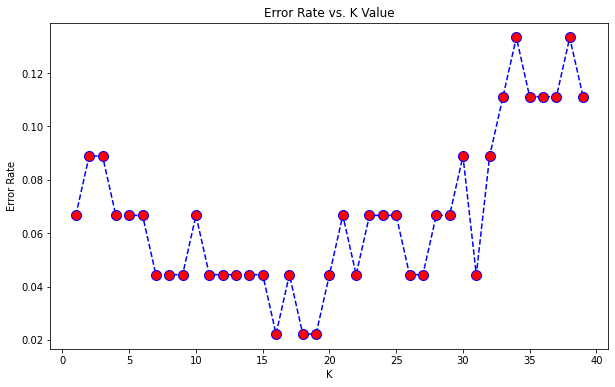

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 9  0  0]
 [ 0 16  1]
 [ 0  2 17]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.94      0.91        17
           2       0.94      0.89      0.92        19

    accuracy                           0.93        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.93      0.93      0.93        45



In [19]:
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[ 9  0  0]
 [ 0 16  1]
 [ 0  2 17]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.94      0.91        17
           2       0.94      0.89      0.92        19

    accuracy                           0.93        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.93      0.93      0.93        45

